# Brief R√©gression logistique

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv('BriefLogistique.csv')

In [4]:
data.shape 

(400, 5)

In [5]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [7]:
# le dataSet engouble 4 variables quantitatives et 1 qualitative
data.dtypes 

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
# v√©rifier si il y a des informations manquantes
data.isna().sum() 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].astype('category').cat.codes 
# remplacer male: 0 et female : 1

In [10]:
data.describe() # les statiques rapides de base

User ID      Gender         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000  400.000000       400.000000  400.000000
mean   1.569154e+07    0.490000   37.655000     69742.500000    0.357500
std    7.165832e+04    0.500526   10.482877     34096.960282    0.479864
min    1.556669e+07    0.000000   18.000000     15000.000000    0.000000
25%    1.562676e+07    0.000000   29.750000     43000.000000    0.000000
50%    1.569434e+07    0.000000   37.000000     70000.000000    0.000000
75%    1.575036e+07    1.000000   46.000000     88000.000000    1.000000
max    1.581524e+07    1.000000   60.000000    150000.000000    1.000000

In [11]:
data.groupby('Gender').count()

User ID  Age  EstimatedSalary  Purchased
Gender                                          
0           204  204              204        204
1           196  196              196        196

In [12]:
data['Gender'] = data['Gender'].astype('category').cat.codes 
# remplacer male: 0 et female : 1

In [13]:
data.groupby('Purchased').count()

User ID  Gender  Age  EstimatedSalary
Purchased                                       
0              257     257  257              257
1              143     143  143              143

## Visualisation des donn√©es

Pyplot et Seaborn, nous permettent d'avoir un aper√ßu rapide sur la nature des donn√©es, voir la distribution, les correlations entre les diff√©rentes variables. Nous allons commencer par voir la distribution des diff√©rents champs


<AxesSubplot:>

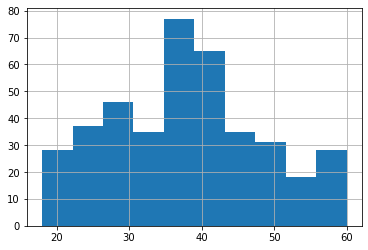

In [14]:
data['Age'].hist()

<AxesSubplot:>

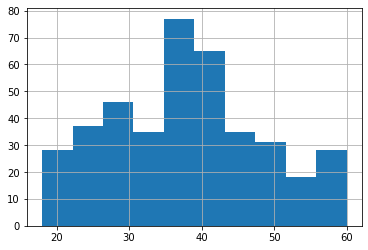

In [15]:
data['Age'].hist()

<AxesSubplot:>

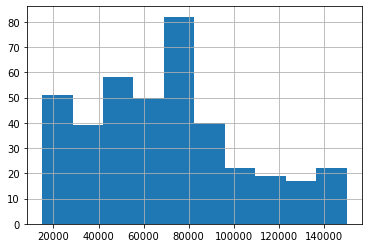

In [16]:
data['EstimatedSalary'].hist()

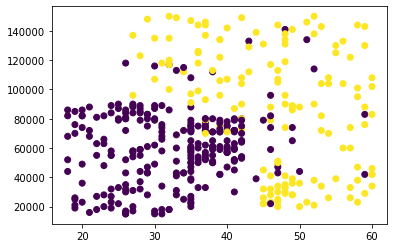

In [144]:
plt.scatter(data.Age, data.EstimatedSalary, c=data.Purchased)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

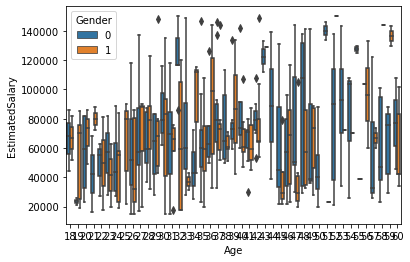

In [145]:
#
sns.boxplot(x ='Age', y ='EstimatedSalary', data = data, hue ="Gender")

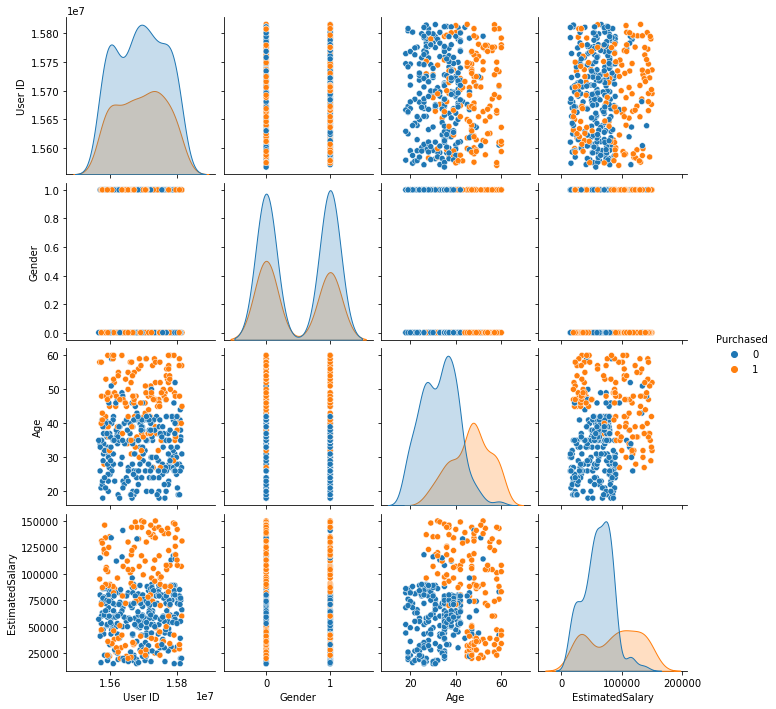

In [17]:
sns.pairplot(data, hue = "Purchased")

<AxesSubplot:>

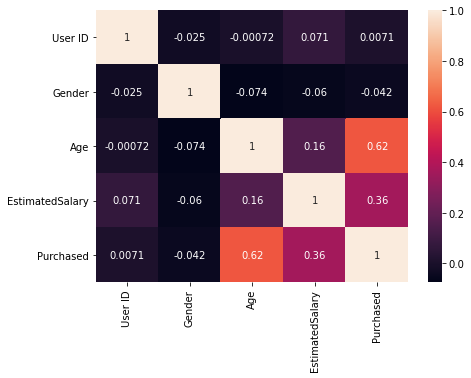

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True)

Selon ces deux graphes, le genre infulence tr√©s peu la d√©cision  d'acheter ou non. De m√™me le userId, n'a aucun indicent sur cette d√©cison. Dans la suite, nous allons proc√©der √† leur √©limination de notre data set.

In [19]:
data1 = data.drop(["User ID","Gender"], axis=1)

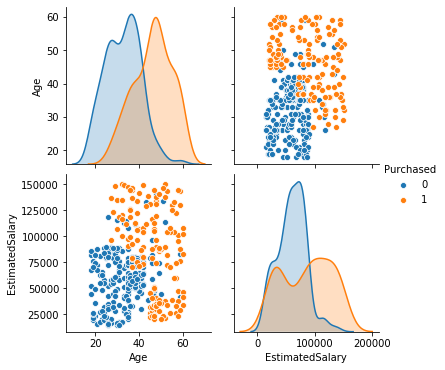

In [107]:
sns.pairplot(data1, hue = "Purchased")

<AxesSubplot:>

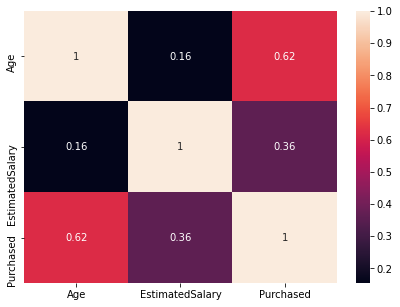

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(data1.corr(),annot=True)

Le graphe suivant indique que l'on pourrait, √©galement, mod√©liser notre probl√®me avec une regression lin√©aire.

/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


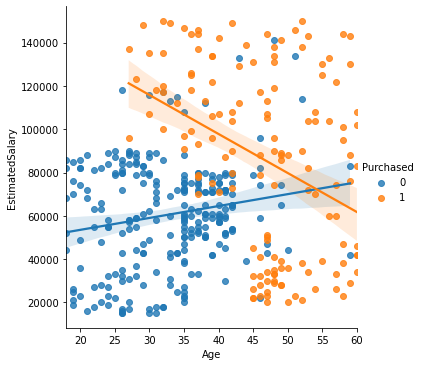

In [21]:
g = sns.lmplot("Age","EstimatedSalary",hue ='Purchased' ,data=data)
    

## La r√©gression logistique 

L'objectif de la r√©gression logistique est de mod√©liser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives.
dans notre exemple le but est de pr√©voir les clients potentiels y = 'Purchased' en fonction des caract√©ristiques disponibles X : " Age ", " EstimatedSalary".
La r√©gression logistique appartient aux mod√®les lin√©aires g√©n√©ralis√©s. Pour rappel, il s‚Äôagit de mod√®les de r√©gression qui sont des extensions du mod√®le lin√©aire, et qui reposent sur trois √©l√©ments :Mod√®les de r√©gressio
        un pr√©dicteur lin√©aire
        une fonction de lien
        une structure des erreurs
        
1. Les  mod√®les  lin√©aires  g√©n√©ralis√©s  
Les mod√®les lin√©aires g√©n√©ralis√©s permettent  d‚Äô√©tudier  la  liaison  entre  une  variable  d√©pendante  ou  r√©ponse  Y et  un  ensemble de variables explicatives ou pr√©dicteurs X1.... X , ils repr√©sentent une g√©n√©ralisation de la regression lin√©aire. le  mod√®le  lin√©aire  g√©n√©ral(  r√©gression  multiple, analyse de la variance et analyse de la covariance )
- le mod√®le lin√©aire 
- la r√©gression logistique- 
- la r√©gression de Poisson.

2. Les principaux √©l√©ments de la r√©gression logistique (RL) :

Elle repose sur trois √©l√©ments :
- un pr√©dicteur lin√©aire
- une fonction de lien
- une structure des erreurs
Dans la RL, ce n‚Äôest pas la r√©ponse binaire (acheter /ou ne pas acheter) qui est directement mod√©lis√©e, mais la probabilit√© de r√©alisation d‚Äôune des deux modalit√©s (acheter /ou ne pas acheter). 
Cette derni√®re ne peut √™tre modiliser par une droite puisque la probabilit√© est limit√©e entre 0 et 1, d'o√π l'importance de modiliser la probalit√©.
Cette derni√®re, est alors mod√©lis√©e par une courbe sigmo√Øde, born√©e par 0, et 1 :

Cette courbe sigmo√Øde est d√©finie par la fonction logistique (fonction sigmo√Øde), d‚Äô√©quation :

f(x)=exp(x) / 1+exp(x)

f(x) = P


# Avec Sklearn

model = LogisticRegression  
model.fit(X,y)   
model.score(X,y)  
model.predict(X,y)   

In [22]:
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import MinMaxScaler
from sklearn.preproceMod√®les de r√©gressiossingimport StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [169]:
#split dataset in features and target variable
#y=data["Purchased"].values.reshape(y.shape[0],1)
y=data["Purchased"]

y.shape

(400,)

In [170]:
X = data.drop(["User ID","Gender","Purchased"], axis=1)

In [171]:
X.shape
X.head()


Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [172]:
from  sklearn.model_selection import train_test_split


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5, random_state=42)
print("Train set X : ", X_train.shape)
print("Test set  X: ", X_test.shape)

print("Train set y: ", y_train.shape)
print("Test set y: ", y_test.shape)





Train set X :  (200, 2)
Test set  X:  (200, 2)
Train set y:  (200,)
Test set y:  (200,)


In [174]:
#Normalisation des donn√©es MinMaxScaler et test_size =0.5



X_minMax = MinMaxScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_minMax,y_train)
S = model.score(X_minMax,y_train)
print("Test score  avec normalisation MinMax:", S )
print ("test_size =0.5")
print("Train score:", S )

X_testMinMax = MinMaxScaler().fit_transform(X_test)
model.fit(X_testMinMax,y_test)
S = model.predict(X_testMinMax)


Test score  avec normalisation MinMax: 0.795
test_size =0.5
Train score: 0.795


In [175]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_minMax)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testMinMax)))

Score train 0.815
Score test 0.845


In [176]:
# Standardisation des donn√©es et et test_size =0.5

X_trainSS = StandardScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_trainSS,y_train)
S = model.score(X_trainSS,y_train)
print("Test score  avec la standardisation:", S )
print ("test_size =0.5")
print("Train score:", S )

X_testSS = StandardScaler().fit_transform(X_test)
model.fit(X_testSS,y_test)
S = model.predict(X_testSS)


Test score  avec la standardisation: 0.835
test_size =0.5
Train score: 0.835


In [177]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainSS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testSS)))

Score train 0.84
Score test 0.855


# Normalisation des donn√©es 

Il est indispensable de normaliser les donn√©es quantitatives, c a d  les mettre toutes sur la m√™me √©chelle ce qui permet de faciliter l'aprentissage des mod√®les.

Nous allons tester trois techniques :

### 1. La Normalisation MinMaxScaler

Consiste √† transformer X  de telle sorte √† √™tre comprise entre 0 et 1.

Xscalde = X - X.min / (X.max - X.min)

In [178]:
#Normalisation des donn√©es MinMaxScaler et test_size =0.25

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state=42)

X_minMax = MinMaxScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_minMax,y_train)
S = model.score(X_minMax,y_train)
print("Test score  avec normalisation MinMax:", S )
print ("test_size =0.25")
print("Train score:", S )

X_testMinMax = MinMaxScaler().fit_transform(X_test)
model.fit(X_testMinMax,y_test)
S = model.predict(X_testMinMax)


Test score  avec normalisation MinMax: 0.8066666666666666
test_size =0.25
Train score: 0.8066666666666666


In [179]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_minMax)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testMinMax)))

Score train 0.7966666666666666
Score test 0.86


### 2. La standardisation : StandardScaler

La deuxi√®me technique de normalisation est la Standardisation de tel sorte que chaque X est une moyenne nulle est un √©crat type √©gale √† 1

Xscaled = X - X.mean / X.std


In [180]:
# Standardisation des donn√©es et et test_size =0.25

X_trainSS = StandardScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_trainSS,y_train)
S = model.score(X_trainSS,y_train)
print("Test score  avec la standardisation:", S )
print ("test_size =0.25")
print("Train score:", S )

X_testSS = StandardScaler().fit_transform(X_test)
model.fit(X_testSS,y_test)
y_pred= model.predict(X_testSS)


Test score  avec la standardisation: 0.8366666666666667
test_size =0.25
Train score: 0.8366666666666667


In [181]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainSS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testSS)))

Score train 0.8466666666666667
Score test 0.9


Pour un client ag√© de 37 ans et avec un salaire de 67000 $, selon le mod√®le la r√©ponse est n√©gative. Le client n'achetera  (avec la standartisation)!


In [182]:
Xpred= StandardScaler().fit_transform([[37,6700]])
model.predict(Xpred)

array([0])

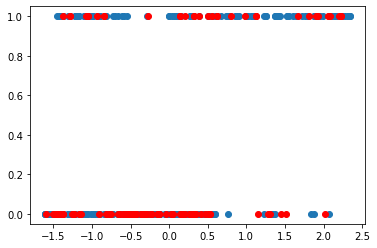

In [36]:
plt.scatter(X_trainSS[:,1], y_train)
plt.scatter(X_testSS[:,1], y_pred, c = 'r')
plt.show()

In [183]:
conf = confusion_matrix(y_test, model.predict(X_testSS))
conf

array([[60,  3],
       [ 7, 30]])

### 3. RobustScaler

Transforme chaque X en √©tant peu sensible aux ouliers

Xscaled = X-mediane / IQR   
Sachant que IQR = Q3-Q1


In [184]:

X_trainRS = RobustScaler().fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_trainRS,y_train)
S = model.score(X_trainRS,y_train)
print("Test score  avec RobustScaler:", S )
print ("test_size =0.25")
print("Train score:", S )

X_testRS = StandardScaler().fit_transform(X_test)
model.fit(X_testRS,y_test)
S = model.predict(X_testRS)



Test score  avec RobustScaler: 0.8333333333333334
test_size =0.25
Train score: 0.8333333333333334


In [150]:

Coef = model.coef_
intercept = model.intercept_

print(Coef)
print(intercept)



[2.55304468e-02 4.12406206e-06]
-0.8981172618731534


## R√©soudre le cas d‚Äô√©tude pr√©sent√© ci-dessous avec la librairie Scikit-Learn. 

Pour un client ag√© de 37 ans et avec un salaire de 67000 $, selon le mod√®le la r√©ponse est n√©gative. Le client n'achetera (normalisation selon la RobustScaler )!

In [185]:

Xpred= RobustScaler().fit_transform([[37,6700]])
model.predict(Xpred)
 

array([0])

In [186]:
print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainRS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testRS)))

Score train 0.8333333333333334
Score test 0.9


In [187]:

from sklearn.model_selection import cross_val_score

In [188]:
cross_val_score(model, X_trainSS, y_train, cv=5)

array([0.83333333, 0.85      , 0.81666667, 0.76666667, 0.83333333])

In [189]:

print("Score train", accuracy_score(y_true=y_train, y_pred=model.predict(X_trainSS)))
print("Score test", accuracy_score(y_true=y_test, y_pred=model.predict(X_testSS)))


Score train 0.8466666666666667
Score test 0.9


In [190]:

conf = confusion_matrix(y_test, model.predict(X_testSS))
conf


array([[60,  3],
       [ 7, 30]])

Les coefficients sur la diagonale indique les √©l√©ments bien class√©s, les coefficients en dehors de ceux que le classifieur a mis dans la mauvaise classe.

## Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression

In [196]:
model = LinearRegression()
model.fit(X_train,y_train)
S = model.score(X_train,y_train)
print("Train score :", S )

slope = model.coef_[0]
intercept = model.intercept_
print(slope)
print(intercept)


Train score : 0.4282737636686488
0.025530446823330544
-0.8981172618731534


On remarque que la regression lin√©aire donne les m√™mes coefs . (a et b) que la regression lin√©aire.

##  R√©soudre le cas d‚Äô√©tude pr√©sent√© ci-dessous avec votre propre classe python sans utiliser la librairie Scikit-Learn.


La mod√©lisation de la probabilit√© 

La courbe sigmo√Øde est d√©finie par la fonction logistique (fonction sigmo√Øde), d‚Äô√©quation:

f(x)= exp(x) / 1 + exp(x) = P

Ainsi:0<f(x)<1

et E(Y) = 0 ou 1

- Y suit une loi de Bernoulli de param√®tre P

- Application de la transformation logit permet de travailler sur des valeurs entre 

 [-‚àû;+‚àû]:

ùëôùëúùëîùëñùë°(ùëù)= ln(ùëù/1‚àíùëù)

    =ùõΩ0 + ùõΩ1ùë•ùëñ1 + ùõΩ2ùë•ùëñ2 + ‚ãØ + ùõΩùëùùë•ùëñùëò
          
- Interpr√©tation des coefficients :

Soit P une probabilit√©, Son odds est d√©fini par :

OddsP = P / 1- P

Cas d‚Äôune seule variable  :

Odds ratio (ou ¬´rapport des cotes¬ª) : OR

C‚Äôest le rapport des cotes des probabilit√©s, d‚Äôavoir la variable expliqu√©e 'y' , avoir  par exemple une maladie pour ceux qui ont un sympt√¥me X d‚Äôune part et de ceux qui ne l‚Äôont pas d‚Äôautre part.

- OR=1, la variable expliqu√©e est ind√©pendante de la variable explicative

- OR>1, la variable expliqu√©e est plus fr√©quente pour les individus qui remplissent la vairable explicative (avoir un symt√¥me pour une maladie).

- OR<1, la variable expliqu√©e est plus fr√©quente pour les individus qui n'observent la variable expliqu√©e (avoir un symt√¥me pour une maladie)


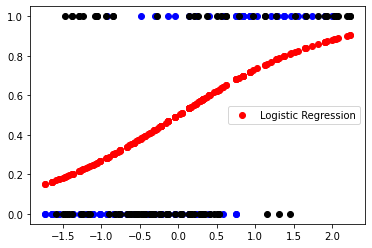

In [193]:
#Modiliser la probabilit√©

#P = f(x)


def fx (x):
    return np.exp(x) / (1 + np.exp(x))

sigma = fx(X_testSS)
plt.scatter (X_testSS, sigma, c= 'r', label='Logistic Regression')
plt.scatter (X_testSS[:,0], y_test, c= 'b')
plt.scatter (X_testSS[:,1], y_test, c= 'black')


plt.legend()

#   Voici un beau Z de Zorro!!!




Rester √† implementer la fonction co√ªt afin d'optimiser la classification de la classe (y =1 ) (couleur jaune) 

// http://www.josephazar.net/blog/mllogreg2.php

Le r√©sum√© de cette article, le seul que j'ai trouvais qu'il pr√©sente les concepts d'une mani√®re compr√©hensible.
 
Une autre mani√®re de pr√©senter la r√©gression logistique.

Nous essayons de presenter la propabilit√© de la mani√®re suivante :

Nous pouvons l'√©crire formellement de la mani√®re suivante:

    P(X)=P(Y=1|X)


Soit w et x sont des vecteurs dont la taille d√©pend du nombre d'entit√©s en entr√©e, et b est le biais scalaire.

Le mod√®le de r√©gression logistique prend des entr√©es √† valeur r√©elle et permet de pr√©dire la probabilit√© que l'entr√©e appartienne √† la  classe (y =1 ).

    Si P > 0.5  ===> pr√©diction classe (y =1 )  
    Si P > 0.5  ===> pr√©diction classe (y =0 )

Pour cet ensemble de donn√©es, la r√©gression logistique a deux coefficients, tout comme la r√©gression lin√©aire, par exemple:

    z(sortie) =  x * w + b


L‚Äôalgorithme d‚Äôapprentissage consistera √† d√©couvrir les meilleures valeurs pour les coefficients ( w et b) en se basant sur les donn√©es d‚Äôapprentissage.

Contrairement √† la r√©gression lin√©aire, le r√©sultat est transform√© en probabilit√© en utilisant la fonction logistique:

    a = P(classe=1) = œÉ(z)

    a = 1 / 1+ e‚àíz
    
- R√©gression logistique par descente de gradient stochastique

La descente de gradient est un algorithme d'optimisation utilis√© pour trouver les valeurs de param√®tres (coefficients) d'une fonction (f) qui minimise une fonction de co√ªt (cost). 

Dans ce cas, les coefficients sont les param√®tres w et b. La fonction f est notre mod√®le de r√©gression logistique utilis√© pour classifier les points de donn√©es. 

L'entr√©e de notre probl√®me est un vecteur X avec des dimensions (n, m). m est le nombre d'observations/d'√©chantillons (ici 400) et n le nombre d'entit√©s (ici 1), nous prenons une seule variable l'√¢ge.

        X[1,400]=[[x1,x2,...,x400]]
        
        X = X_testSS[:,0]
        
Les coefficients sont initialis√©s √† z√©ro:


        w[1,1] = [[0]]
        
        b = 0
 
Pour chaque √©chantillon de notre ensemble de donn√©es X, nous allons calculer la pr√©diction comme suit:

        pr√©diction = 1 / 1 + e‚àí(xi * w + b)
        
Nous pouvons calculer les nouvelles valeurs de coefficient en utilisant deux √©quations de mise √† jour simples:

    w = w ‚àí Œ± * ( xi *  (pr√©diction ‚àí yi ))
    
    b = b ‚àí Œ± * (1 * (pr√©diction ‚àí yi))
    
Tels:  

    Œ± :  le taux d'apprentissage
    
    y_i : la cat√©gorie / √©tiquette r√©elle de l'√©chantillon i.

Alpha est un param√®tre que nous devons sp√©cifier au d√©but du parcours d‚Äôentra√Ænement.

Il s‚Äôagit du taux d‚Äôapprentissage et de la mesure dans laquelle les coefficients (et donc le mod√®le) changent ou apprennent √† chaque mise √† jour.


